Visualize discrete samples

In [75]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

Read sample data

In [ ]:
sloss = []
sgood = []
ssele = []

with open("sample_loss_t0.csv", newline='') as slossf, open("sample_good_t0.csv", newline='') as sgoodf, open("summary_t0.csv", newline='') as sselef:
    slossr = csv.reader(slossf, delimiter=',', quotechar='|', quoting=csv.QUOTE_NONNUMERIC)
    sgoodr = csv.reader(sgoodf, delimiter=',', quotechar='|')
    sseler = csv.reader(sselef, delimiter=',', quotechar='|')
    _ = next(sseler) # skip header

    for l,g,s in zip(slossr,sgoodr,sseler):
        sloss.append(l)
        sgood.append(g)
        ssele.append(int(s[-1]))

# Incorporate selection into good array
for i,s in enumerate(ssele):
    sgood[i][s] += "Selected"

Plot

Good sample rate = 0.1027
Good sample selected rate = 1.0
Min sample selected rate = 0.74


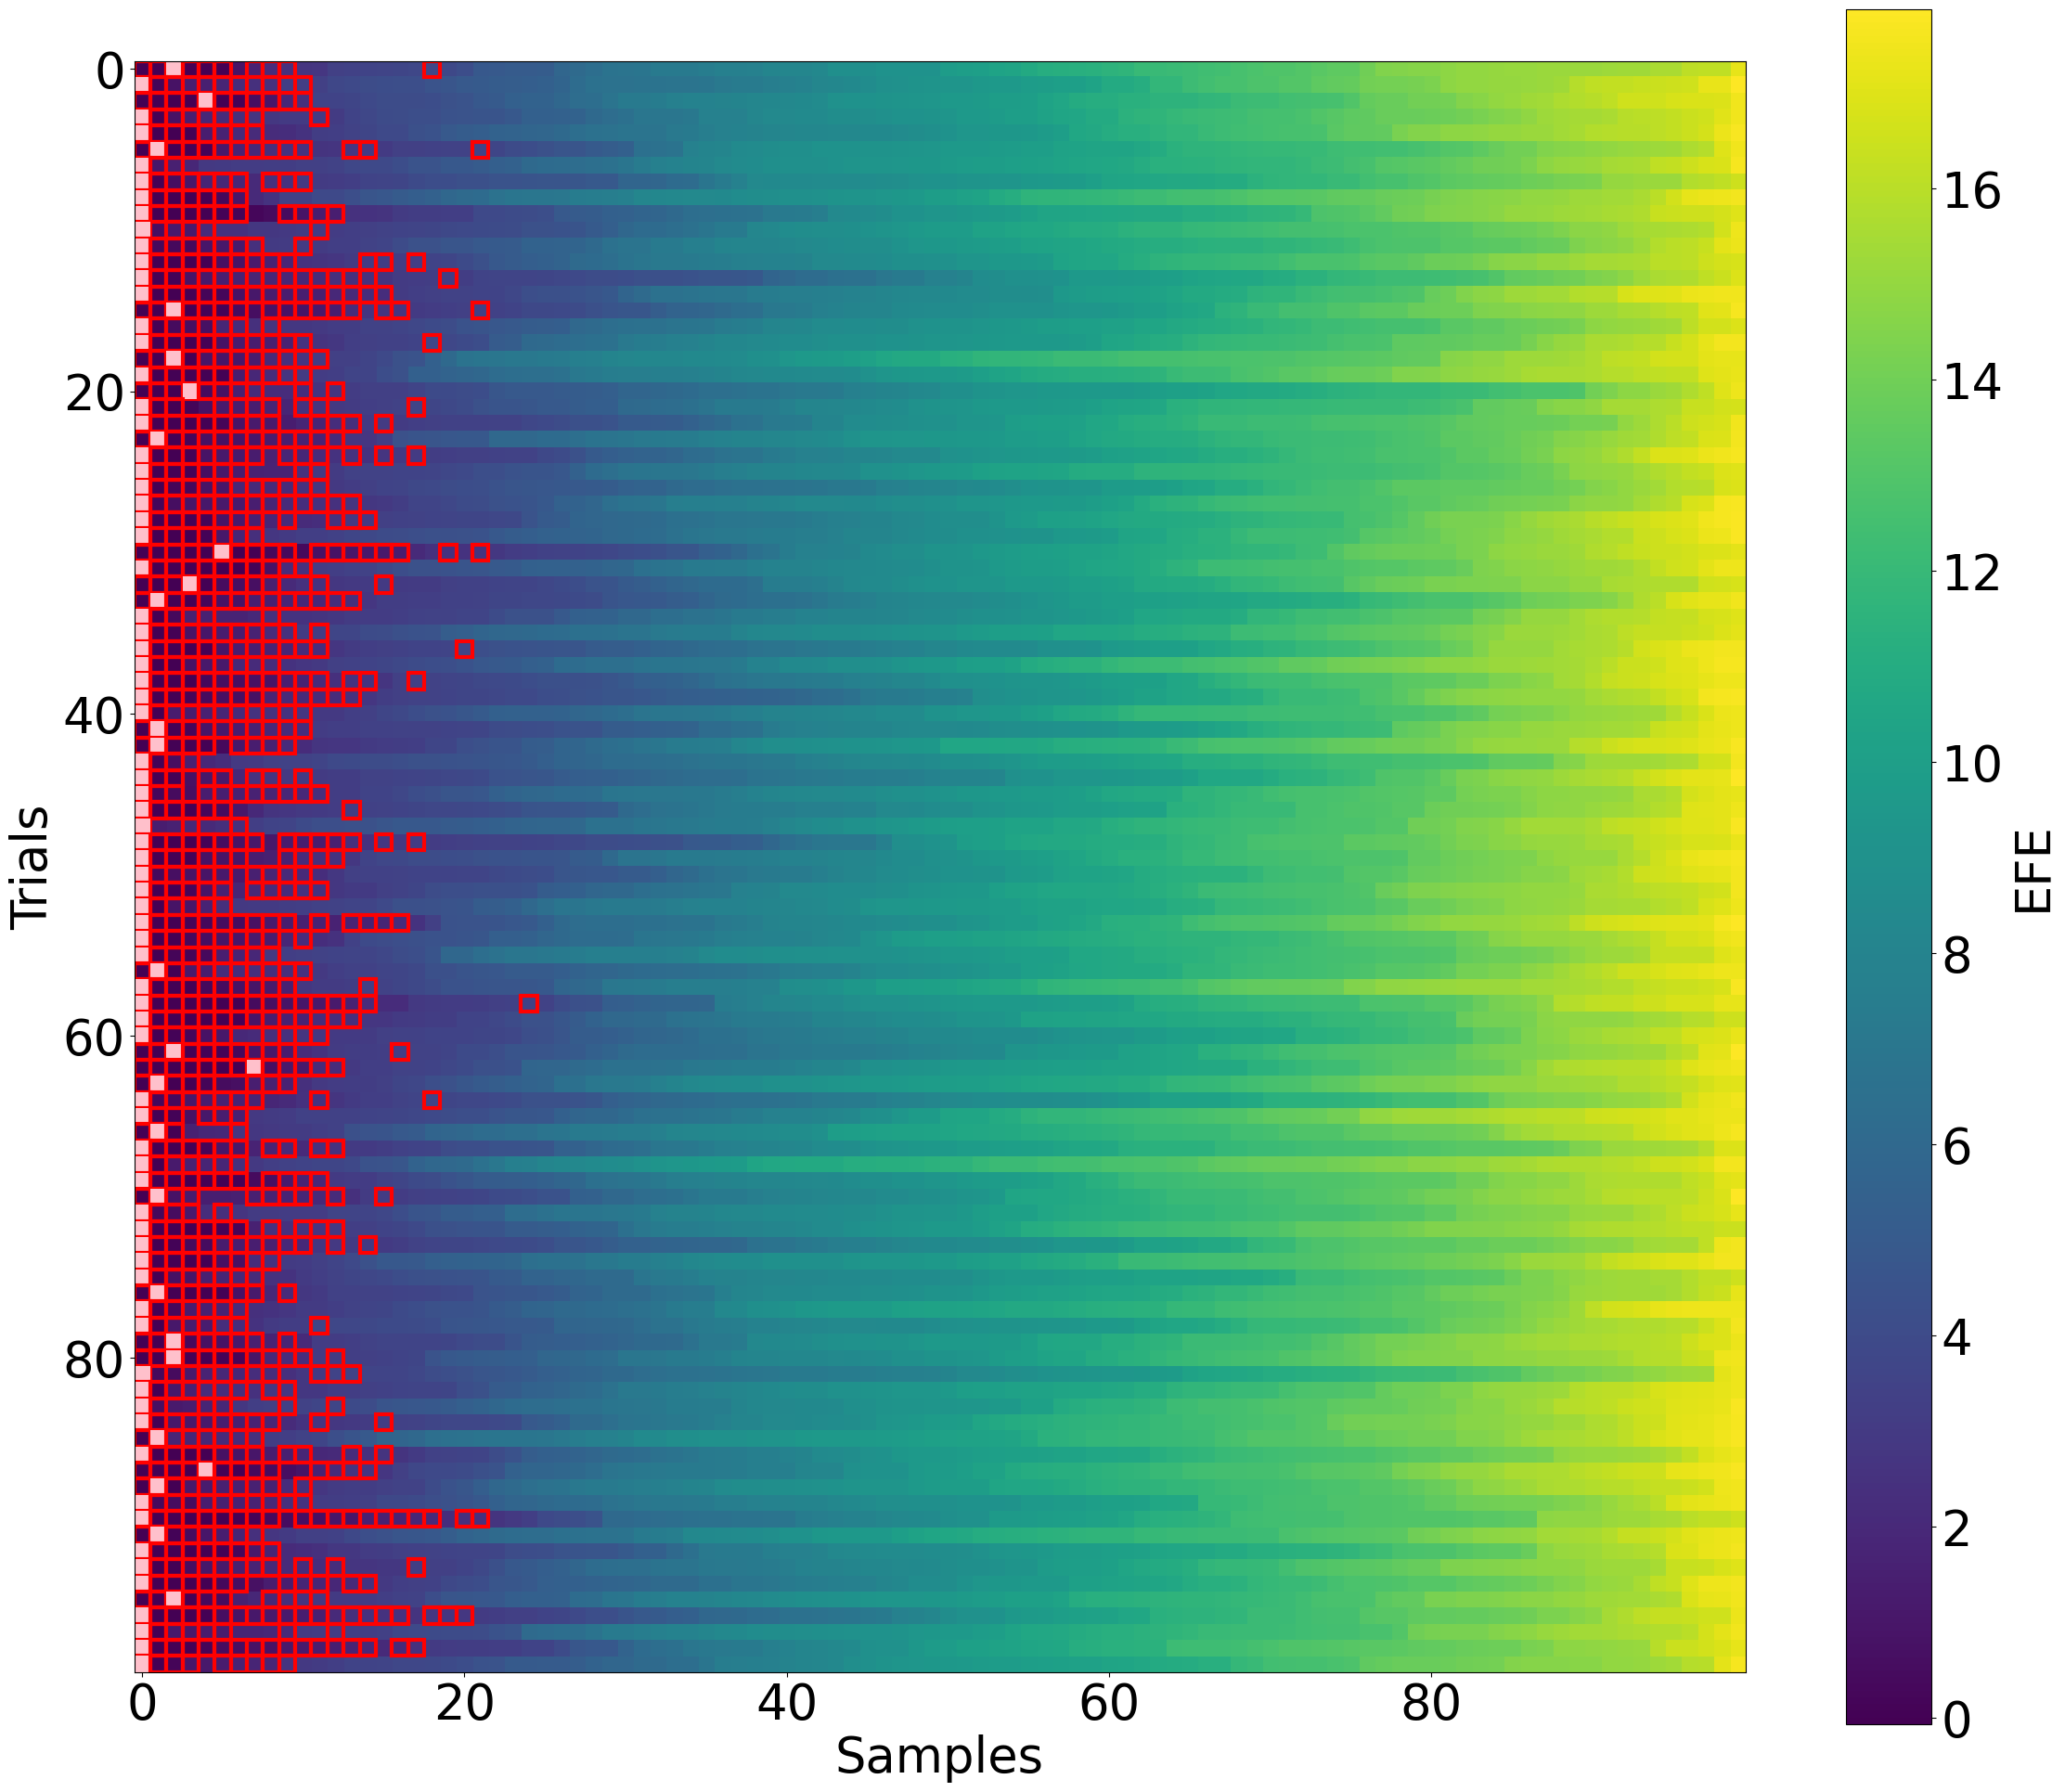

In [145]:
font = {"size": 38}
plt.rc("font", **font)
fig, ax = plt.subplots(figsize=(14*2,12*2))
plt.rc({"font.size": 18})
ax.set_xlabel("Samples")
ax.set_ylabel("Trials")
sloss = np.array(sloss)
sgood = np.array(sgood)
sloss_sort = np.argsort(sloss)
np.savetxt("sorted_idx.txt", sloss_sort, fmt='%d')
_sloss = sloss[np.arange(sloss.shape[0])[:,None], sloss_sort]
_sgood = sgood[np.arange(sgood.shape[0])[:,None], sloss_sort]
cl = ax.imshow(_sloss)
# Counters
good_samples = 0
goodsel_counter = 0
minsel_counter = 0
for ys,s in enumerate(_sgood):
    y = ys-0.5
    # Highlight good samples
    for xg,g in enumerate(s):
        if "True" in g:
            x = xg-0.5
            ax.add_patch(Rectangle((x,y), 1, 1, fill=False, edgecolor='red', lw=1.5*2))
            good_samples += 1
        if "Selected" in g:
            x = xg-0.5
            ax.add_patch(Rectangle((x,y), 1, 1, fill=True, edgecolor='None', facecolor='pink', lw=1.5*2))
            if xg == 0:
                minsel_counter += 1
            if "True" in g:
                goodsel_counter += 1
print("Good sample rate =", good_samples/(sgood.shape[0]*sgood.shape[1]))
print("Good sample selected rate =", goodsel_counter/len(_sgood))
print("Min sample selected rate =", minsel_counter/len(_sgood))
cb = plt.colorbar(cl, label="EFE")
# cb.remove()
plt.show()